In [1]:
import pandas as pd
import os

In [2]:
result_dir = '../results/ids-dataset'

# Load data

In [6]:
df_tr17 = pd.read_parquet(os.path.join(result_dir,"cicids2017_traindf.parquet"))
df_te17 = pd.read_parquet(os.path.join(result_dir,"cicids2017_testdf.parquet"))

In [7]:
df_tr18 = pd.read_parquet(os.path.join(result_dir,"cicids2018_traindf.parquet"))
df_te18 = pd.read_parquet(os.path.join(result_dir,"cicids2018_testdf.parquet"))

# Load scalers and models

In [10]:
import pickle
with open(os.path.join(result_dir,"cicids2017_LR_binary.pkl"),"rb") as f:
    lr_clf17 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2018_LR_binary.pkl"),"rb") as f:
    lr_clf18 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2017_LR_mult.pkl"),"rb") as f:
    lr_clfm17 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2018_LR_mult.pkl"),"rb") as f:
    lr_clfm18 = pickle.load(f)

In [12]:
with open(os.path.join(result_dir,"cicids2018_stscaler_binary.pkl"),'rb') as f:
    st_scaler_bn18 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2017_stscaler_binary.pkl"),'rb') as f:
    st_scaler_bn17 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2017_stscaler.pkl"),'rb') as f:
    st_scaler_m17 = pickle.load(f)
with open(os.path.join(result_dir,"cicids2018_stscaler.pkl"),'rb') as f:
    st_scaler_m18 = pickle.load(f)    

In [34]:
from utils import *

In [35]:
lab_dic17, lab_name17 = cluster_labels_2017()
lab_dic18, lab_name18 = cluster_labels_2018()

{'Web Attack \x96 Brute Force': 0, 'Web Attack \x96 XSS': 0, 'Web Attack \x96 Sql Injection': 0, 'DDoS': 1, 'Bot': 2, 'DoS slowloris': 3, 'DoS Slowhttptest': 4, 'DoS Hulk': 5, 'DoS GoldenEye': 6, 'PortScan': 7, 'FTP-Patator': 8, 'SSH-Patator': 9}
{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


In [16]:
train_mul17 = set_multiple_label(df_tr17,label_col='Label', label_dic = lab_dic17, return_col=False)
test_mul17 = set_multiple_label(df_te17,label_col='Label', label_dic = lab_dic17, return_col=False)

drop Benign
drop Infiltration
drop Heartbleed
original instances:  1040360
drop intances:  751106
after drop:  289254
drop Benign
drop Infiltration
drop Heartbleed
original instances:  260090
drop intances:  187670
after drop:  72420


In [17]:
train_mul18 = set_multiple_label(df_tr18,label_col='Label', label_dic = lab_dic18, return_col=False)
test_mul18 = set_multiple_label(df_te18,label_col='Label', label_dic = lab_dic18, return_col=False)

drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  5971201
drop intances:  5310540
after drop:  660661
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  1492801
drop intances:  1327411
after drop:  165390


In [18]:
trainx_m17 = train_mul17.loc[:,train_mul17.columns!='Label']
trainy_m17 = train_mul17['Label']
testx_m17 = test_mul17.loc[:,test_mul17.columns!='Label']
testy_m17 = test_mul17['Label']

In [19]:
testx_m17[testx_m17.columns[0]]

1            80.0
4            80.0
5          3211.0
7            80.0
9            80.0
           ...   
260078       80.0
260081    30951.0
260083     1154.0
260084       21.0
260088       80.0
Name: Destination Port, Length: 72420, dtype: float64

In [20]:
trainx_m18 = train_mul18.loc[:,train_mul18.columns!='Label']
trainy_m18 = train_mul18['Label']
testx_m18 = test_mul18.loc[:,test_mul18.columns!='Label']
testy_m18 = test_mul18['Label']

In [21]:
def apply_clf_with_scaler(clf, scaler, df_x, prob = False):
    df_x_st = scaler.transform(df_x)
    if prob:
        return clf.predict_proba(df_x_st)
    else:
        return clf.predict(df_x_st)
def score_clf_with_scaler(clf, scaler, df_x, df_y):
    df_x_st = scaler.transform(df_x)
    return clf.score(df_x_st, df_y)

In [22]:
print("test acc for attack classification", \
      score_clf_with_scaler(lr_clfm17,st_scaler_m17,testx_m17,testy_m17))
print("test acc for attack classification",\
      score_clf_with_scaler(lr_clfm18,st_scaler_m18,testx_m18,testy_m18))

test acc for attack classification 0.9990196078431373
test acc for attack classification 0.999673499002358


/home/srp/.pyenv/versions/torchnlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/srp/.pyenv/versions/torchnlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


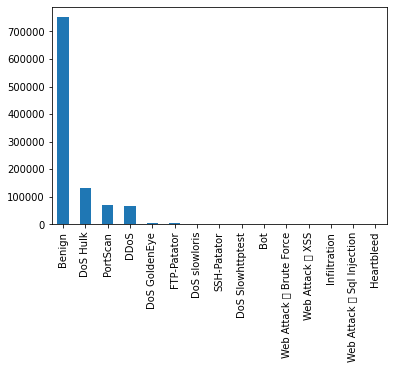

In [23]:
import matplotlib.pyplot as plt
ax17 = df_tr17['Label'].value_counts().plot(kind='bar')

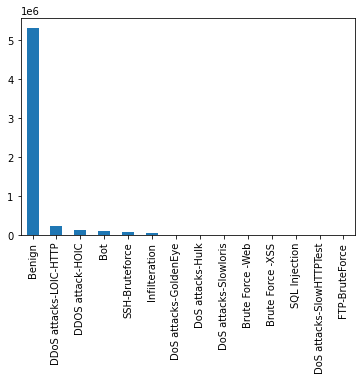

In [24]:
ax18 = df_tr18['Label'].value_counts().plot(kind='bar')

In [25]:
print(lab_name17)
print(lab_name18)

['Web Attack', 'DDoS', 'Bot', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'PortScan', 'FTP-Patator', 'SSH-Patator']
['Web Attack', 'DoS attacks-Hulk', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'Bot', 'DDoS attacks-LOIC-HTTP', 'DDOS attack-HOIC', 'Infilteration', 'FTP-BruteForce', 'SSH-Bruteforce']


# test across datasets

## 18 -> 17

In [28]:
ooc_col = 9 # 
true_col = 9 # 
ooc_idx = (train_mul18['Label']==ooc_col)
train_ooc = train_mul18.loc[ooc_idx]
train_ooc = train_ooc.loc[:,train_ooc.columns!='Label']

In [29]:
import collections
ct = collections.Counter(train_ooc['Destination Port'].values)

In [30]:
train_ooc.shape

(75161, 67)

In [31]:
pred = apply_clf_with_scaler(lr_clfm17,st_scaler_m17, train_ooc)

In [32]:
sum(pred ==true_col)/len(pred)

0.9995476377376565

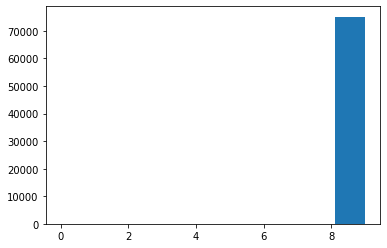

In [33]:
import matplotlib.pyplot as plt
plt.hist(pred)
plt.show()